# Project Numpy - Raf Mesotten - Feb 2024

## STEP 1 - Initialize Git Repository
Initialize a git repository on your personal GitHub account to track changes and collaborate effectively. You
can add the data into this git repo.

https://github.com/craftyraf/project_numpy_3

## STEP 2 - Create Virtual Environment with Anaconda
Utilize Anaconda to establish a virtual environment for your project. Ensure that you install only the necessary
packages required for the project.

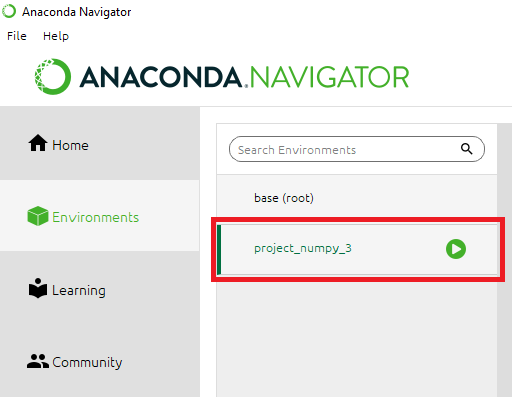

## STEP 3 - Choose & Load image

#### Import necessary external libraries

In [24]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../scripts')  # Adjust the path accordingly

#### Importing custom scripts in the 'scripts' folder

In [25]:
import image_manipulations as img
import image_builders as bld

#### Define input and output paths

In [26]:
loc_input_img = os.path.join('..', 'data', 'input', 'carcassonne.jpg')
output_path = os.path.join('..', 'data', 'output')
# absolute_path = os.path.abspath(loc_input_img)
# print(absolute_path)

#### Loading the image and getting the underlying numpy object

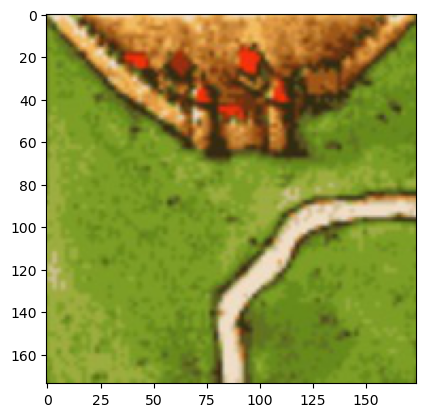

In [27]:
image = Image.open(loc_input_img)
np_image = np.array(image)

plt.imshow(np_image)
# plt.savefig(os.path.join(output_path, 'original.jpg'))
plt.show()

## STEP 4 - "Do my image manipulations"
Use Numpy to create manipulated versions of the original image.

#### Manipulation 1

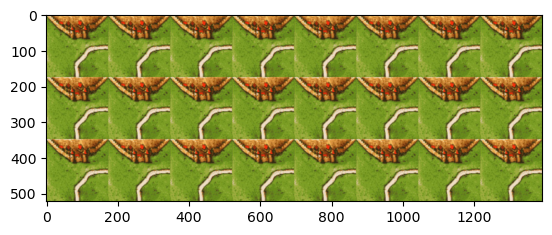

In [28]:
result_manipulation_1 = bld.tile(np_image, 3, 8)
plt.imshow(result_manipulation_1)
# plt.savefig(os.path.join(output_path, 'STEP_4__manipulation_1.jpg'))
plt.show()

#### Manipulation 2

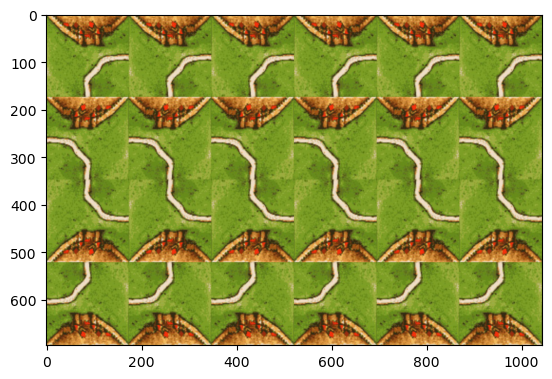

In [29]:
row_1 = bld.tile(np_image, 1, 6)
row_2 = bld.tile(img.h_flip(np_image), 1, 6)
row_3 = bld.tile(img.v_flip(np_image), 1, 6)
row_4 = bld.tile(img.h_flip(img.v_flip(np_image)), 1, 6)
result_manipulation_2 = np.vstack([row_1, row_2, row_3, row_4])
plt.imshow(result_manipulation_2)
# plt.savefig(os.path.join(output_path, 'STEP_4__manipulation_2.jpg'))
plt.show()

#### Manipulation 2b (extra, respecting the rules of the Carcassonne game)

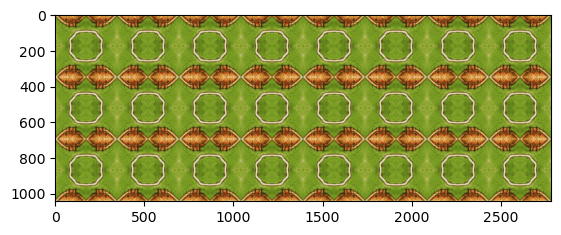

In [30]:
# Creating a 2x2 square image using 4 tiles with different orientations
top_left = np_image
bottom_left = img.v_flip(np_image)
top_right = img.h_flip(np_image)
bottom_right = img.h_flip(img.v_flip(np_image))

left = np.vstack([top_left, bottom_left])
right = np.vstack([top_right, bottom_right])
little_square = np.hstack([left, right])

# Tiling the 2x2 image
result = bld.tile(little_square, 3, 8)
plt.imshow(result)
# plt.savefig(os.path.join(output_path, 'STEP_4__manipulation_2b.jpg'))
plt.show()

#### Manipulation 3

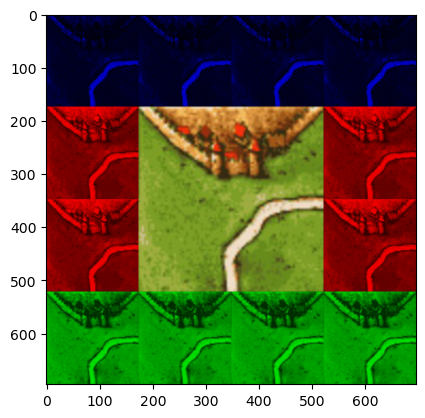

In [31]:
# Creating the background first
row_1 = bld.tile(img.color(np_image, 'b'), 1, 4)  # 1 row with 4 blue
row_2 = bld.tile(img.color(np_image, 'r'), 1, 4)  # 1 row with 4 red
row_3 = bld.tile(img.color(np_image, 'r'), 1, 4)  # 1 row with 4 red
row_4 = bld.tile(img.color(np_image, 'g'), 1, 4)  # 1 row with 4 green
result_manipulation_3 = np.vstack([row_1, row_2, row_3, row_4])

# Putting the big one on top of it
d = np.shape(np_image)
result_manipulation_3[d[0]:3*d[0], d[0]:3*d[0], :] = img.enlarge(np_image, 2)
plt.imshow(result_manipulation_3)
# plt.savefig(os.path.join(output_path, 'STEP_4__manipulation_3.jpg'))
plt.show()

## STEP 5 - "Generalize these manipulations"
Generalize the image manipulations that you created in Step 4.

#### Manipulation 1
Define a function grid_with_flips(image, matrix), where matrix is a matrix containing the type of flips that you do with your image.

You could say 0 for you image not flipped, 1 for flipping your image left right, 2 for flipping it upside down 
and 3 for flipping it both left right and upside down.

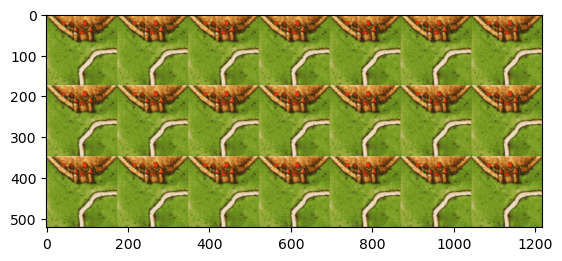

In [33]:
input_matrix_1 = [[0 for i in range(7)] for j in range(3)]
result_1 = bld.grid_with_flips(np_image, input_matrix_1)
plt.imshow(result_1)
# plt.savefig(os.path.join(output_path, 'STEP_5__manipulation_1.jpg'))
plt.show()

#### Manipulation 2a

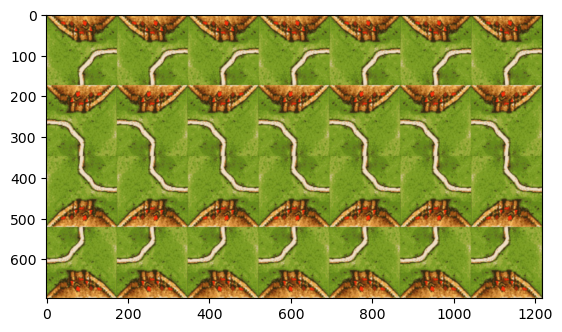

In [34]:
input_matrix_2a = [[j for i in range(7)] for j in range(4)]
result_2a = bld.grid_with_flips(np_image, input_matrix_2a)
plt.imshow(result_2a)
# plt.savefig(os.path.join(output_path, 'STEP_5__manipulation_2a.jpg'))
plt.show()

#### Manipulation 2b - respecting the rules of the Carcassonne game

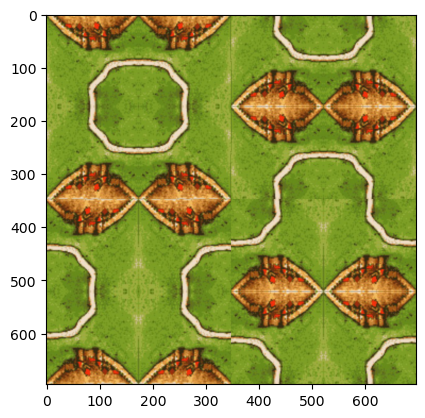

In [35]:
input_matrix_2b = [[0, 1, 2, 3], [2, 3, 0, 1], [1, 0, 3, 2], [3, 2, 1, 0]]
result_2b = bld.grid_with_flips(np_image, input_matrix_2b)
plt.imshow(result_2b)
# plt.savefig(os.path.join(output_path, 'STEP_5__manipulation_2b.jpg'))
plt.show()

#### Manipulation 3a - big one
Define a function create_colorful_big_one(colors) where colors is a list of colors (starting left top and rotating clockwise). 

The image from Step 4 is the result of calling the function
create_colorful_big_one(['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r']).

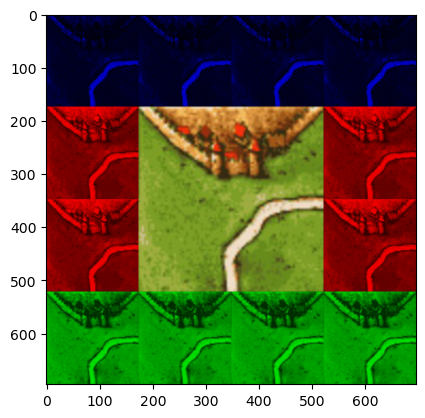

In [36]:
input_matrix_3a = ['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r']
big_one = bld.create_colorful_big_one(np_image, input_matrix_3a)
plt.imshow(big_one)
# plt.savefig(os.path.join(output_path, 'STEP_5__manipulation_3a.jpg'))
plt.show()

#### Manipulation 3b - bigger one
Custom manipulation

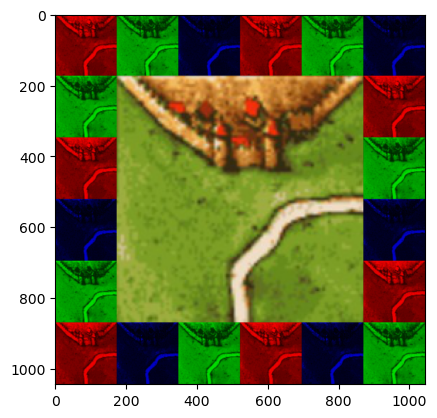

In [37]:
input_matrix_3b = ['r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b', 'r', 'g']
big_one = bld.create_colorful_big_one(np_image, input_matrix_3b)
plt.imshow(big_one)
# plt.savefig(os.path.join(output_path, 'STEP_5__manipulation_3b.jpg'))
plt.show()

#### Manipulation 3c - big one, but with len(matrix) % 4 != 0
Custom manipulation

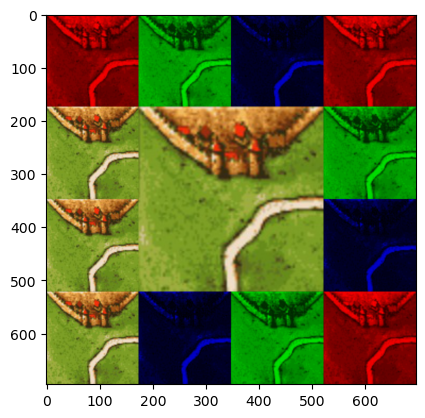

In [38]:
input_matrix_3c = ['r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b']
big_one = bld.create_colorful_big_one(np_image, input_matrix_3c)
plt.imshow(big_one)
# plt.savefig(os.path.join(output_path, 'STEP_5__manipulation_3c.jpg'))
plt.show()

## STEP 6 - "Your own manipulations"

#### Pixelized image
Custom manipulation

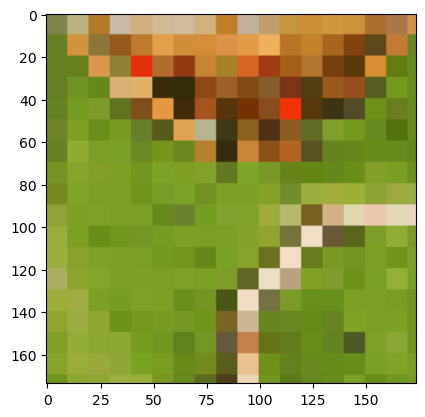

In [39]:
pixelized_image = img.pixelize(np_image, step=10)  # step 10 = 10 pixels form 1 big pixel
plt.imshow(pixelized_image)
# plt.savefig(os.path.join(output_path, 'STEP_6__manipulation_1.jpg'))
plt.show()

#### Quantized colors
Custom manipulation

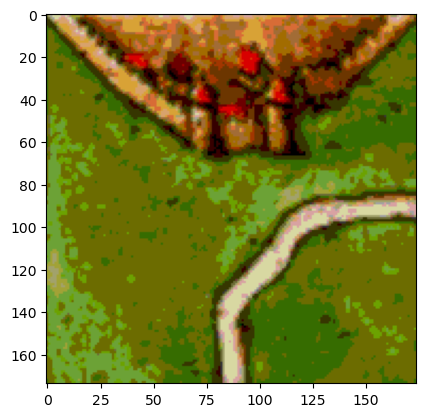

In [40]:
quantized_image = img.color_quantization(np_image, 54)  # factor 54 = manually chosen optimum
plt.imshow(quantized_image)
# plt.savefig(os.path.join(output_path, 'STEP_6__manipulation_2.jpg'))
plt.show()

#### Combination of image manipulations combined with the 'grid with flips' function
Custom manipulation

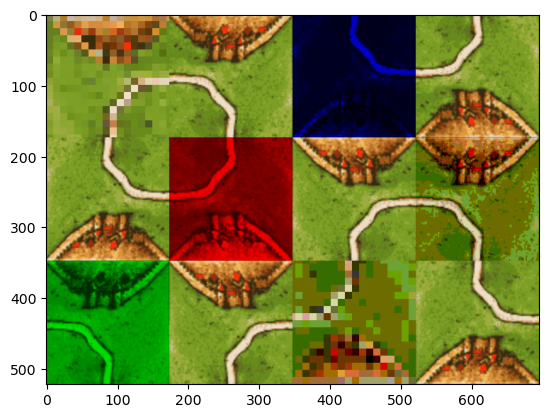

In [41]:
input_matrix_combo_1 = [["0p", 1, "2b", 3], [2, "r3", 0, "q1"], ["g1", 0, "qp3", 2]]
result_combo_1 = bld.grid_with_flips(np_image, input_matrix_combo_1)
plt.imshow(result_combo_1)
# plt.savefig(os.path.join(output_path, 'STEP_6__manipulation_3.jpg'))
plt.show()